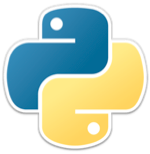


# Python Coding Club

This series is to introduce Python as a programming language to be used for data analysis, scientific computing and plotting. It is by __no means comprehensive__ but will provide a basis for further investigation and exploration into this powerful language. These notes are __best visualised__ in a __Jupyter Notebook__ and I encourage you to __follow along__ in your __preferred IDE__.

# Part 5: Classes

Part 5 of this series will focus on another useful concept, **classes**. Whilst classes are very useful they might not seem useful at first glance, however, as your program/analysis becomes more complex, your program may benefit from encapsulating similar sets of functions as a class.

In any case, understanding classes will be highly useful when utilising imported external libraries/modules to understand their documentation.

## Exercise Solutions

## Exercise 5.1: Class attributes

In this exercise, we will be creating a `Planet` class with attributes `radius`, `mass`, `water`, `tilt`, `orbit_time` and `gravity`.

Set the variables to `radius = 6371`, `mass = 5.972e24`, `water = True`, `tilt = 23.5`, `orbit_time = 365`. Set the `gravity` attribute to the gravitational field strength via the equation:

$$
g = \frac{GM}{r^2}
$$

Where $G$ is the universal graviational constant, i.e. `6.67e-11`. 

Create a `Planet` object called `earth` and another called `mars`. Set the attributes of `mars` to the correct values for mars and print them.

First write the name of the attributes and their values in the `Planet` definition. Create a `Planet` object called `earth` and another called `mars`. 

Try setting each attribute of `mars` to the correct values (a quick Google search can find everything). Print the values of `mars.radius` and `earth.radius`. Print other attributes of `mars` and `earth` to familiarise yourself with the notation. 

Lastly, print the percentage of Earths gravity that Mars is (i.e. the ratio of their gravitational field strengths).

**Bonus**: Try updating all of the attributes of `mars` at once by utilising the `__dict__.update()` method.

**Hint**: The `Planet` class can use its attributes when assigned to determine other attributes, i.e. it can use the radius and mass to determine the gravity. However, remember this is simply a number, therefore when assigning `mars`'s mass and radius, you will need to update it's gravity too. 

In [1]:
class Planet:
# -------------------------------------------------------------------------
# DEFINE PLANET ATTRIBUTES
    G = 6.67e-11
    radius = 6371
    mass = 5.972e24
    water = True
    tilt = 23.5
    orbit_time = 365
    gravity = G*mass/radius**2
    
# -------------------------------------------------------------------------
# CREATE PLANET OBJECTS
earth = Planet()
mars = Planet()

# -------------------------------------------------------------------------
# UPDATE MARS ATTRIBUTES
mars_attributes = {'radius': 3389.5, 'mass': 6.39e23, 'water': True, 'tilt': 25, 
                   'orbit_time': 687}
mars.__dict__.update(mars_attributes)
mars.gravity = Planet.G*mars.mass/mars.radius**2

# -------------------------------------------------------------------------
# PRINT ATTRIBUTES, INCLUDING RATIO OF GRAVITATIONAL STRENGTHS

print(mars.radius)
print(earth.radius)
print((mars.gravity/earth.gravity)*100)

3389.5
6371
37.80288914822607


**Explanation**: Firstly, we define the new `Planet` class with the specific attributes corresponding to Earth's values. Next we create the `Planet` objects `earth` and `mars`. This initialises the attributes to correspond with `Planet` attributes. Therefore to change the attributes we could simply reassign each one by using `mars.radius = ` etc, or we could update them all at the same time using a `dict` of `mars_attributes` and updating the `mars.__dict__` with these new attributes instead. Notice afterwards I also update the `mars.gravity` using `mars.radius` and `mars.mass` afterwards to avoid copying and pasting the radius and mass of `mars` again. 

## Exercise 5.2: Initialising objects

**i).**

In this exercise, you will create an `Animal` class that takes `colour`, `kind`, `diet` and `name` as parameters to the `__init__()` function. Then save these parameters as **object attributes**.

Then see if your class has worked correctly by executing the cell below.

**Hint**: Remember the first parameter to the `__init__()` method is a reference to the object itself, normally called `self`.

In [2]:
class Animal:
    def __init__(self, colour, kind, diet, name):
        self.name = name
        self.colour = colour
        self.kind = kind
        self.diet = diet
        

In [3]:
lion = Animal('beige', 'mammal', 'meat', 'Lion')
elephant = Animal('grey', 'mammal', 'plants', 'Elephant')
python = Animal('green', 'reptile', 'insects', 'Python')

for animal in [lion, elephant, python]:
    print(animal.__dict__)

{'name': 'Lion', 'colour': 'beige', 'kind': 'mammal', 'diet': 'meat'}
{'name': 'Elephant', 'colour': 'grey', 'kind': 'mammal', 'diet': 'plants'}
{'name': 'Python', 'colour': 'green', 'kind': 'reptile', 'diet': 'insects'}


**Explanation**: Here we set the object attibutes via `self.<attribute name>` in the initialising method `__init__()` when the constructor is **called**. This then sets all the correct variables to the correct attributes upon creating an `Animal` object. 

**ii). Harder**

In this exercise, we will create a `PolarPosition` class which takes parameters `x`, `y` and `z` in cartesian coordinates in the `__init__()` function. 

A `PolarPosition` object then has attributes `r`, `theta` and `phi` based on the following equations:

$$
x = r\sin(\phi)\cos(\theta)\\
y = r\sin(\phi)\sin(\theta)\\
z = r\cos(\phi)
$$

After creating the class, create to `PolarPosition` objects with `pos1 --> x = 2, y = 3, z = 10` and `pos2 --> x = 5, y = 3, z = 1`, then run the code below. 

Check your class works as desired by using this [polar coordinate calculator](https://keisan.casio.com/exec/system/1359533867). This link also contains the conversion of the coordinate bases. 

**Hint**: Work out how to return `r`, `theta` and `phi` from `x`, `y` and `z` and have them saved as attributes. A quick Google search will find how to convert these two coordinate bases if you are struggling. **Don't forget** that the first parameter to the `__init__()` method is a reference to the object itself, normally denoted `self`. Pythons `math` module is imported so that `sin` etc functions can be used including `sqrt()`. The `sin()` and other trigonmetric functions use **radians** so keep that in mind when checking your answer. 

In [4]:
from math import sin, asin, cos, acos, tan, atan, sqrt 
# Needed to use sin(), cos(), tan() and their inverses (asin() etc.)

class PolarPosition:
# -------------------------------------------------------------------------
# CREATE INIT METHOD WITH APPROPRIATE PARAMETERS AND SAVE TO *OBJECT* ATTRIBUTES.
    def __init__(self, x, y, z):
        self.r = sqrt(x**2 + y**2 + z**2)
        self.theta = atan(y/x)
        self.phi = atan(sqrt(x**2+y**2)/z)

# -------------------------------------------------------------------------
# CREATE TWO PolarPosition OBJECTS WITH APPROPRIATE PARAMETERS.
pos1 = PolarPosition(2, 3, 10)
pos2 = PolarPosition(5, 3, 1)
# -------------------------------------------------------------------------

# For each PolarPosition object print their attributes.
for pos in [pos1, pos2]:
    print(pos.__dict__)

{'r': 10.63014581273465, 'theta': 0.982793723247329, 'phi': 0.34604693088923016}
{'r': 5.916079783099616, 'theta': 0.5404195002705842, 'phi': 1.400950038711223}


**Explanation**: Here we use the `__init__()` method to take parameters when constructing the `PolarPosition` objects `pos1` and `pos2`. 

## Exercise 5.3: Methods

In this exercise, we will be expanding on the previous exercises in part 4 and the `LinearModel` shown above to add a method to evaluate the mean sum of squarred errors for a `LinearModel` object. 

$$
h(x) = mx + c
$$
 
Set the parameters `m` and `c` to object attributes and complete the `evaluate`, `meanSquaredError` and `predict` and `update_model` **methods** consistent with their **docstrings**.

Remember, methods can call **other methods** in the class, allowing you to easily seperate code out.

As a reminder, the mean squared error equation is:

$$
R = \frac{1}{N}\sum\limits_{i=0}^{N}{(y_i - h(x_i))^2}
$$

**Bonus** see if you can complete each function in a singular line of code. The `meanSquaredError` and `predict` methods will require list comprehensions to achieve this.

Parameters: {'theta': [0, 1]}
Mean Squared Error:	113.3918
y:		[3.2, 5.6, 8.0, 10.2, 11.8, 15.0, 17.3, 19.3, 21.6, 24.2, 26.5]
predictions:	[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

Parameters: {'theta': [3, 2.3]}
Mean Squared Error:	0.1473
y:		[3.2, 5.6, 8.0, 10.2, 11.8, 15.0, 17.3, 19.3, 21.6, 24.2, 26.5]
predictions:	[3.0, 5.3, 7.6, 9.9, 12.2, 14.5, 16.8, 19.1, 21.4, 23.7, 26.0]


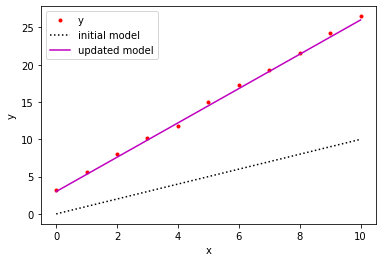

In [3]:
class LinearModel:
    """
    Creates a LinearModel object.
    """
    def __init__(self, c, m):
        """
        Initialises a LinearModel object with attributes equal to c and m.
        """
    # -------------------------------------------------------------------------
        self.theta = [c, m]

    # -------------------------------------------------------------------------
    
    def evaluate(self, x):
        """
        Method that takes a numeric argument 'x' and returns the value h for h(x) = m*x + c
        """
    # -------------------------------------------------------------------------
        return self.theta[1]*x + self.theta[0]
    
    # -------------------------------------------------------------------------
    
    def meanSquaredError(self, x, y):
        """
        Method to produce the mean squared error between the evaluated LinearModel (h(x)) and the observed values y
        for each value in 'x' and 'y' to return the meanSquaredError.
        Takes two arguments, the 'x' and the 'y' lists of data.
        """
    # -------------------------------------------------------------------------
        return sum([(y[i] - self.evaluate(x[i]))**2 for i in range(len(y))])*(1/len(y))
    
    # -------------------------------------------------------------------------
    
    def predict(self, x):
        """
        Predict method to take a list of 'x' data and evaluate the LinearModel on each element in the 'x' list.
        Returns a list of 'h(x)' predicted values.
        """
    # -------------------------------------------------------------------------
        return [self.evaluate(xel) for xel in x]
    
    # -------------------------------------------------------------------------
    
    def update_model(self, c, m):
        """
        Update model simply used to reassign the slope and intercept values of the LinearModel object to 
        'm' and 'c' arguments respectively.
        """
    # -------------------------------------------------------------------------
        self.theta = [c, m]
    
    # -------------------------------------------------------------------------

# Dataset
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [3.2, 5.6, 8.0, 10.2, 11.8, 15.0, 17.3, 19.3, 21.6, 24.2, 26.5]

# For visualisation of results.
%matplotlib inline       
import matplotlib.pyplot as plt
plt.plot(x, y, 'r.', label='y')
plt.xlabel("x")
plt.ylabel("y")

# LinearModel object generation.
linear = LinearModel(0, 1)

# Obtaining values from the linear object methods.
meanSquaredError = linear.meanSquaredError(x, y)
predicitions = linear.predict(x)

# Visualising initial model.
plt.plot(x, linear.predict(x), 'k:', label='initial model')

# Printing formatted values.
predicitions = [float('%.1f'%pred) for pred in predicitions]
print(f'Parameters: {linear.__dict__}')
print(f'Mean Squared Error:\t{meanSquaredError:.4f}')
print(f'y:\t\t{y}')
print(f'predictions:\t{predicitions}\n')

# -------------------------------------------------------------------------
# Play around with the parameters of the LinearModel, see what predictions you can get out.

linear.update_model(3, 2.3)

# -------------------------------------------------------------------------

# Obtaining values again.
meanSquaredError = linear.meanSquaredError(x, y)
predicitions = linear.predict(x)

# Visualising updated model.
plt.plot(x, linear.predict(x), 'm-', label='updated model')
plt.legend()

# Printing updated model values.
predicitions = [float('%.1f'%pred) for pred in predicitions]
print(f'Parameters: {linear.__dict__}')
print(f'Mean Squared Error:\t{meanSquaredError:.4f}')
print(f'y:\t\t{y}')
print(f'predictions:\t{predicitions}')

**Explanation**: Here we create the `LinearModel` class. It initially takes `c` and `m` as arguments. In this implementation, I save both `c` and `m` in a singular object attribute that is a `list` called `self.theta`. Then in the `evaluate` method, I simply access the `self.theta` elements that correspond with the slope (`m`) and intercept (`c`) respectively to return the evaluated result with respect to position `x` passed into the `evaluate` **method**.

Next I define the `meanSquaredError` function to take both a list of `x` and `y` data. I use a list comprehension to create a list of the squared differences between each `x[i]` and `y[i]` in the lists. I use `self.evaluate(x[i])` for each value of `x` to determine `h(x)` and take the difference between each value of `y` and square this difference. This produces a list of squared differences, which can then be summed using the `sum()` function. Dividing by the `len(y)` produces the **mean** squared error.

Then for the `predict` method, a similar list comprehension is used to return a list of predicted values by passing each element of `x` into `self.evaluate()` and producing a list of predicted values. 

The `update_model` **method** then allows the user to reset the `m` and `c` parameters in the model by saving the object attributes to the new arguments passed. 

Below the class definition I create a `LinearModel` object by passing the correct arguments into the constructor. I also plot the data using an external library **`matplotlib`** that I will cover in further parts. I then retrieve and print the values for the mean squared error and the predicitions given that linear model. 

Changing the parameters using `update_model`, and re-executing the cell then also produces the new mean square error and predicitions. Both the initial model and the updated model are also plotted to visualise the results. 

## Exercise 5.4: Special methods

In this exercise, we are going to create a `Vector` class with different special methods one by one.

When completeing each section, remove the appropriate `pass` keyword from under the method you are coding on, but leave the keywords for the other sections. 

Uncomment out the appropriate code in the cell below the `Vector` definition to check that your implementation has worked for each section before moving onto the next section!

### i).

In this first section, we shall define the following special methods for our `Vector` class:

`__init__`, `__add__`,  `__sub__`, `__mul__` and `__truediv__` methods.

The vector is initialised with a variable number of arguments, these are saved in an `self.elements` attribute.
It may also be useful to define a `self.length` which is `len(self.elements)` to compare the lengths of the `Vector` objects.

The operation of the `+` and `-` operator on a `Vector` object for a `float` or `int` should perform element wise addition on the components of the vector (the type of the argument can be determined by using `isinstance()`). 
The operation of adding one `Vector` object to another should only occur if the `Vector` objects have the **same number of elements**, otherwise it should **raise an error**. 

The operation of the `*` and `/` operators on a `Vector` object for a `float` or `int` should perform element wise multiplication/division of that value on each element. 
The `*` and `/` operators acting on one `Vector` to another should only work if the **lengths** of the vector are the same and perform element wise multiplication/division, i.e. for $x$ and $y$:

$$
x = \begin{bmatrix} x_0\\x_1\\x_2\\ \vdots \\ x_n \end{bmatrix},  y = \begin{bmatrix} y_0\\y_1\\y_2\\ \vdots \\ y_n \end{bmatrix}
$$

Then:

$$
xy = \begin{bmatrix} x_0y_0\\x_1y_1\\x_2y_2\\ \vdots \\ x_ny_n \end{bmatrix}
$$

and... 

$$
x/y = \begin{bmatrix} x_0/y_0\\x_1/y_1\\x_2/y_2\\ \vdots \\ x_n/y_n \end{bmatrix}
$$

These methods (`__add__`, `__sub__`, `__mul__` and `__truediv__` should all **return a new Vector object with the required elements**.

**Tip**, once you have successfully made one method, the other methods can be implemented in the exact same way (i.e. you can copy and paste) just remember to change the operator in each method accordingly!

We can also define the action of the `+=`, `-=`, `*=` and `/=` operators on our `Vector` object by using `__iadd__`,  `__isub__`, `__imul__` and `__itruediv__` special methods.

The implementation for these methods can be literally identical to the respective `__add__`,  `__sub__`, `__mul__` and `__truediv__` methods defined before.

### ii).

This section contains creating **normal methods** for inserting and deleting elements in the `Vector` objects. 

Just for fun lets also include an `insert_el` method to insert a new element into the vector at a given index.

See if you can get the method to take a **variable number of elements to insert** with **using a container for the indices** at which to insert the elements into. Make the method viable for **single index and single elements as well** (use a check using `isinstance()` to determine whether the `index` has been passed as a list or an `int`). Remember that you **cannot access containers using `float` types**, so make sure you do not include `float` in the `isinstance()` check for a singular number.

Lets also create a `del_el` method that takes a **variable number of indices** at which to remove elements from. Then use a loop or list comprehnsion to remove the elements using `.pop()` on `self.elements` for each index. 

These methods should **not** return a new Vector object and should instead just alter the existing one. Remember to update the `self.length` parameter at the end of each **method**. 

Visually for:

$$
x = \begin{bmatrix} x_0\\x_1\\x_2\\ \vdots \\ x_n \end{bmatrix}
$$

Then:
$$
x.insert\_el(0, a) = \begin{bmatrix} a\\x_0\\x_1\\ \vdots \\ x_{n+1} \end{bmatrix}
$$
Here we have inserted `a` into index `0`.

and:
$$
x.del\_el(0, 2) = \begin{bmatrix} x_1\\x_3\\x_4\\ \vdots \\ x_{n-2} \end{bmatrix}
$$

Here we have removed entries at index `0` and `2` refering to $x_0$ and $x_2$ respectively. Now the Vector's length is 2 less than it was before.

### iii). 

Back to special methods. Here we will define what the action of `vector_obj[2]` and what happens when `print(vector_obj)` is called using the `__getitem__` and `__str__` methods respectively. We will also define the action of `vector_obj[0] = value` with the `__setitem__` method. 

This is essentially making a **slice representation** of the vector object (`__getitem__`) and a **string representation** of the object `__str__`.

For the `__getitem__` method, we will pass a value into the **method** and return the corresponding element from `self.elements[value]`. This will then mean that our `Vector` object can be sliced.

For the `__setitem__` method, we will similarly pass an index and a value into the **method** and then set the specific index equal to that value. We could also use an `isinstance()` check to catch whether the `value` is not a `float` or `int` since the `+` and `-` operators would not work later with other objects.

For the `__str__` object, we simply want to return the string representation of the elements (i.e. `str(self[:])` if the `__getitem__` method has been implemented.

### iv). 

We can also define the action of the `**` operator and the `len()` function on our `Vector` objects using `__pow__` and `__len__` special methods.

For the `**` operator, we would like the `Vector` to perform elementwise exponentiation to each element of the `Vector`.

The action of the `len()` function (to invoke the `__len__` method) should provide us with the number of elements in the `Vector`. Previously, we had defined this as `self.length`, however instead of retrieving the number of elements of the `Vector` I would like you to redefine the `self.length` attribute to return the floating point value for the **magnitude** of the `Vector`.

The magnitude or **length** of a `Vector` $a$ can be given by:

$$
||a|| = \sqrt{a_0^2 + a_1^2 + a_2^2 + a_3^2 + \dots + a_n^2}
$$

essentially this is the square-root of the sum of the squared elements.

Try and utilise the `**` operator on the vector object itself by using `self**2` and the `sum()` and `sqrt()` functions to return the magnitude.

Remember, anywhere that you may have used `self.length` as a `len(self.elements)` value will need to be updated, including in the `__add__` and other special methods.

Also make sure to update what `self.length` is when executing `insert_el` and `del_el` methods as well.

In [1]:
from math import sqrt # Importing sqrt function from math for part iv).

class Vector:
    """Vector class used for elementwise operations."""
    
# --------------------------------------------------------------------------------------------------------------------  
# PART i). Implementing the initialise, addition, subtraction, multiplication and division operators.
# --------------------------------------------------------------------------------------------------------------------
    
    def __init__(self, *args):
        """
        Make the init method set the 'args' to self.elements (a list containing the args) and work out a length for
        the vector in terms of its elements.
        """
        # -------------------------------------------------------------------------
        self.elements = list(args)
        self.length = sqrt(sum(el**2 for el in self.elements))
       
        # -------------------------------------------------------------------------
    
    def __add__(self, arg):
        """
        The add operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 'int'/'float' or 
        of type 'Vector'. Use list comprehensions to perform element wise operation on each element in 'self.elements'
        in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        if isinstance(arg, (int, float)):
            elements = [el+arg for el in self.elements]
            return Vector(*elements)
        elif isinstance(arg, Vector):
            if len(arg.elements) != len(self.elements):
                raise IndexError(f'Vector lengths do not match: {len(self.elements)} != {len(arg.elements)}')
            else:
                elements = [self.elements[i]+arg.elements[i] for i in range(len(self.elements))]
                return Vector(*elements)
        # -------------------------------------------------------------------------
    
    def __sub__(self, arg):
        """
        The sub operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 'int'/'float' or 
        of type 'Vector'. Use list comprehensions to perform element wise operation on each element in 'self.elements'
        in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        if isinstance(arg, (int, float)):
            elements = [el-arg for el in self.elements]
            return Vector(*elements)
        elif isinstance(arg, Vector):
            if len(arg.elements) != len(self.elements):
                raise IndexError(f'Vector lengths do not match: {len(self.elements)} != {len(arg.elements)}')
            else:
                elements = [self.elements[i]-arg.elements[i] for i in range(len(self.elements))]
                return Vector(*elements)
        # -------------------------------------------------------------------------
    
    def __mul__(self, arg):
        """
        The mul operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 'int'/'float' or 
        of type 'Vector'. Use list comprehensions to perform element wise operation on each element in 'self.elements'
        in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        if isinstance(arg, (int, float)):
            elements = [el*arg for el in self.elements]
            return Vector(*elements)
        elif isinstance(arg, Vector):
            if len(arg.elements) != len(self.elements):
                raise IndexError(f'Vector lengths do not match: {len(self.elements)} != {len(arg.elements)}')
            else:
                elements = [self.elements[i]*arg.elements[i] for i in range(len(self.elements))]
                return Vector(*elements)
        # -------------------------------------------------------------------------
    
    
    def __truediv__(self, arg):
        """
        The truediv (/) operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 
        'int'/'float' or of type 'Vector'. Use list comprehensions to perform element wise operation on each 
        element in 'self.elements' in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        if isinstance(arg, (int, float)):
            elements = [el/arg for el in self.elements]
            return Vector(*elements)
        elif isinstance(arg, Vector):
            if len(arg.elements) != len(self.elements):
                raise IndexError(f'Vector lengths do not match: {len(self.elements)} != {len(arg.elements)}')
            else:
                elements = [self.elements[i]/arg.elements[i] for i in range(len(self.elements))]
                return Vector(*elements)
        # -------------------------------------------------------------------------

        
    # Assignment operators: Note these should have the exact same implementation as above, note the slight name 
    # change for the methods however (i)add etc.
        
    def __iadd__(self, arg):
        """
        The iadd operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 'int'/'float' or 
        of type 'Vector'. Use list comprehensions to perform element wise operation on each element in 'self.elements'
        in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        if isinstance(arg, (int, float)):
            elements = [el+arg for el in self.elements]
            return Vector(*elements)
        elif isinstance(arg, Vector):
            if len(arg.elements) != len(self.elements):
                raise IndexError(f'Vector lengths do not match: {len(self.elements)} != {len(arg.elements)}')
            else:
                elements = [self.elements[i]+arg.elements[i] for i in range(len(self.elements))]
                return Vector(*elements)
        # -------------------------------------------------------------------------
    
    def __isub__(self, arg):
        """
        The sub operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 'int'/'float' or 
        of type 'Vector'. Use list comprehensions to perform element wise operation on each element in 'self.elements'
        in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        if isinstance(arg, (int, float)):
            elements = [el-arg for el in self.elements]
            return Vector(*elements)
        elif isinstance(arg, Vector):
            if len(arg.elements) != len(self.elements):
                raise IndexError(f'Vector lengths do not match: {len(self.elements)} != {len(arg.elements)}')
            else:
                elements = [self.elements[i]-arg.elements[i] for i in range(len(self.elements))]
                return Vector(*elements)
        # -------------------------------------------------------------------------
    
    def __imul__(self, arg):
        """
        The mul operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 'int'/'float' or 
        of type 'Vector'. Use list comprehensions to perform element wise operation on each element in 'self.elements'
        in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        if isinstance(arg, (int, float)):
            elements = [el*arg for el in self.elements]
            return Vector(*elements)
        elif isinstance(arg, Vector):
            if len(arg.elements) != len(self.elements):
                raise IndexError(f'Vector lengths do not match: {len(self.elements)} != {len(arg.elements)}')
            else:
                elements = [self.elements[i]*arg.elements[i] for i in range(len(self.elements))]
                return Vector(*elements)
        # -------------------------------------------------------------------------
    
    
    def __itruediv__(self, arg):
        """
        The truediv (/) operator takes an argument 'arg'. Write code to check whether the 'arg' is of type 
        'int'/'float' or of type 'Vector'. Use list comprehensions to perform element wise operation on each 
        element in 'self.elements' in keeping with the equation above.
        
        Should return a new Vector object with the new desired elements.
        """
        # -------------------------------------------------------------------------
        if isinstance(arg, (int, float)):
            elements = [el/arg for el in self.elements]
            return Vector(*elements)
        elif isinstance(arg, Vector):
            if len(arg.elements) != len(self.elements):
                raise IndexError(f'Vector lengths do not match: {len(self.elements)} != {len(arg.elements)}')
            else:
                elements = [self.elements[i]/arg.elements[i] for i in range(len(self.elements))]
                return Vector(*elements)
        # -------------------------------------------------------------------------  
        
    
    # Now execute the cell for Part i). below to check that your implementation for part i). is correct
    # (execute this cell first to load the Vector class).

    
# --------------------------------------------------------------------------------------------------------------------  
# PART ii). Implementing the 'insert_el' and 'delete_el' methods.
# --------------------------------------------------------------------------------------------------------------------
    
    def insert_el(self, index, *args):
        """
        This method should take the argument `index` as either an `int`/`float` or a `tuple`/`list` whilst the 
        elements to insert should be variably long positional arguments 'args'. Use 'isinstance()' to check the 
        input of 'index' and insert the elements accordingly. This method should not return a new object, it should
        update the current self.elements. 
        Remember to also update the 'self.length' attribute.
        """
        # -------------------------------------------------------------------------
        if isinstance(index, int):
            for arg in args[::-1]:
                self.elements.insert(index, arg)
        elif isinstance(index, (tuple, list)):
            if len(index) != len(args):
                raise IndexError(f'Incorrect number of indices to elements to insert: {len(index)} != {len(args)}')
            else:
                [self.elements.insert(index[i], args[i]) for i in range(len(index))] 
        else:
            raise TypeError(f'Type {type(index)} is not a valid index type.')
        self.length = sqrt(sum(self**2))
        # -------------------------------------------------------------------------
        
    def del_el(self, *indices):
        """
        This method should take a variable number of indices to remove the elements of the Vector.
        This should not return a new Vector object, it should alter the existing elements.
        Remember to also update the 'self.length' attribute.
        """
        # -------------------------------------------------------------------------
        [self.elements.pop(idx-1) if indices[0] != idx else self.elements.pop(idx) for idx in indices]
        self.length = sqrt(sum(self**2))
        # -------------------------------------------------------------------------
        
        
        # Now execute the cell for Part ii). below to check that your implementation for part ii). is correct
        # (execute this cell first to reload the Vector class).
        
        
# --------------------------------------------------------------------------------------------------------------------  
# PART iii). Implementing the getter and setter methods.
# -------------------------------------------------------------------------------------------------------------------- 
        
    def __getitem__(self, idx):
        """
        The getitem method should take a singular argument 'idx' and return the element corresponding to the the index 
        'idx' in self.elements.
        """
    # -------------------------------------------------------------------------
        return self.elements[idx]
    # -------------------------------------------------------------------------
    
    def __setitem__(self, index, val):
        """
        The setitem method should take arguments of 'index' and a 'value'. First check the 'value' is valid (i.e. an
        'int', 'float' or 'Vector' object) and then update the element of 'self.element[index]' as 'value'.
        """
        # -------------------------------------------------------------------------
        if not isinstance(val, (int, float, Vector)):
            raise TypeError(f'Type {type(val)} not valid, valid values are of type int, float or Vector.')
        else:
            self.elements[index] = val
        # -------------------------------------------------------------------------
    
    def __str__(self):
        """
        This str method should simply return a 'str()' of the list of elements in the Vector.
        """
        # -------------------------------------------------------------------------
        return str(self[:])
        # -------------------------------------------------------------------------
        
        
        # Now execute the cell for Part iii). below to check that your implementation for part iii). is correct
        # (execute this cell first to reload the Vector class).
        
# --------------------------------------------------------------------------------------------------------------------  
# PART iv). Implementing the exponentiation and len methods (remember to update the above code when doing this part).
# -------------------------------------------------------------------------------------------------------------------- 
    
    def __pow__(self, arg):
        """
        This pow method should be very similar to the add and sub methods defined above, however we do not want it to 
        be able to take a Vector object as an 'arg' so the implementation should be easier.
        This should return a new Vector object with the correct elements.
        """
        # -------------------------------------------------------------------------
        if isinstance(arg, (int, float)):
            elements = [el**arg for el in self.elements]
            return Vector(*elements)
        else:
            raise TypeError(f'Unsupported type {type(arg)} for exponentiation, only types float or int are valid.')
        # -------------------------------------------------------------------------
    
    def __len__(self):
        """
        Now make the len function return the number of elements in the Vector object (i.e. use len(self.elements)).
        
        Remember to now update the 'self.length' to be the magnitude of the Vector, you may have to replace regions of
        your code where 'self.length' is used and use 'len(self)' instead, once the '__len__' method is completed 
        correctly.
        """
        # -------------------------------------------------------------------------
        return len(self.elements)
        # -------------------------------------------------------------------------
    
    
    # Now execute the cell for Part iv). below to check that your implementation for part iv). is correct
    # (execute this cell first to reload the Vector class).


In [2]:
# Part i).
v1 = Vector(3,5,7,2)

print('Part i). Operators.')
print(f'v1 = {v1.elements}')

v2 = v1 + 3
v3 = v1 - 3
v4 = v1 * 4
v5 = v1 / 2
print('Vector number operations')
print(f'v2 = {v2.elements}\t\t(v1 + 3)')
print(f'v3 = {v3.elements}\t\t(v1 - 3)')
print(f'v4 = {v4.elements}\t\t(v1 * 4)')
print(f'v5 = {v5.elements}\t(v1 / 2)')

print('Vector vector operations')
v6 = v1 + v2
v7 = v1 * v2
v8 = v1 / v5
print(f'v6 = {v6.elements}\t\t(v1 + v2)')
print(f'v7 = {v7.elements}\t\t(v1 * v2)')
print(f'v8 = {v8.elements}\t(v1 / v2)')

Part i). Operators.
v1 = [3, 5, 7, 2]
Vector number operations
v2 = [6, 8, 10, 5]		(v1 + 3)
v3 = [0, 2, 4, -1]		(v1 - 3)
v4 = [12, 20, 28, 8]		(v1 * 4)
v5 = [1.5, 2.5, 3.5, 1.0]	(v1 / 2)
Vector vector operations
v6 = [9, 13, 17, 7]		(v1 + v2)
v7 = [18, 40, 70, 10]		(v1 * v2)
v8 = [2.0, 2.0, 2.0, 2.0]	(v1 / v2)


**Part i). Explanation**:

This part consisted of assigning the `self.attributes` attribute to a `list` of the passed `args`. This creates the elements of the `Vector`. 

The implementation of the `__add__` and other operator methods is the exact same, with the only difference being the operator (`+`, `-` etc.) in the list comprehnsions.

These methods take an argument (the number on the other side of the operator) and first check to see if the `arg` is either an `int` or a `float` or a `Vector` object. If the object is a `float` or `int`, a list comprehension (`elements = [el+arg for el in self.elements]`) is used to perform element wise operations on each element in the `Vector`. Then the `return` statement returns a new `Vector` object by calling the vector object constructor with the elements list unpacked as the arguments.

It is subtly different when using a `Vector + Vector` operation, whereby the list comprehension is:

`elements = [self.elements[i]+arg.elements[i] for i in range(len(self.elements))]`


which means that the elements list contains the addition of the first element of the current `Vector` object with the first element of the `arg` Vector object and so on for each element in the current `Vector` object. Of course this would not make sense when adding vectors of different sizes, so there is a check that uses the `raise` keyword to raise an `IndexError` if the vectors do not match in length. 

This implementation is the same for the assignment operators as well. 

In [8]:
# Part ii).
v = Vector(3,6,7,10)

print('Part ii). Insert and delete methods.')
print(f'v = {v.elements}, length = {len(v.elements)}\n')

v.insert_el(3, -10)

print("Insertion of -10 at index 3")
print(f'v = {v.elements}, length = {len(v.elements)}\n')

v.insert_el((0,2), 0,10)

print("Insertion of 0 and 10 at indices 0 and 2")
print(f'v = {v.elements}, length = {len(v.elements)}\n')

v.del_el(0, 5)

print("Deletion of elements at indices 0 and 5")
print(f'v = {v.elements}, length = {len(v.elements)}')

Part ii). Insert and delete methods.
v = [3, 6, 7, 10], length = 4

Insertion of -10 at index 3
v = [3, 6, 7, -10, 10], length = 5

Insertion of 0 and 10 at indices 0 and 2
v = [0, 3, 10, 6, 7, -10, 10], length = 7

Deletion of elements at indices 0 and 5
v = [3, 10, 6, 7, 10], length = 5


**Part ii). Explanation**:

This part involved making the `insert_el` and `del_el` **methods**. 

The `insert_el` method takes either a singular index (`int`) or a `list`/`tuple` of indices. Which is passed is determined by the `isinstance()` check on the `index` parameter at first. If a singular index is passed, and multiple elements, the elements are simply all added to the `Vector` at the specified index. The elements are added in order by looping over the `args` list backwards by using `args[::-1]` which means start at `0`, end at the last element and take steps of `-1` in the slicing.

If a tuple/list of indices is given, the length must match the length of the `args` provided, otherwise there would be a mismatch in what elements are supposed to be inserted at what indices. However if not, `self.elements` is inserted with each element at the specified index in order using a `for` loop in a list comprehension and `.insert()` method for the `self.elements` list. Since the `.insert()` method does not return anything, the list comprehension is simply a line of code that just updates the `self.elements` list. The `self.length` value is then adjusted for the new elements involved in the `Vector`.


The `del_el` method is much simpler, it takes a variable number of `*indices` and then uses a list comprehension to `.pop(index)` for each `index` in `indices`. The `.pop()` method **does** return a value, however we are not interested in saving a reference to it, therefore there is no assignment associated with the list comprehension. Again, `self.length` is updated again. 

In [9]:
# Part iii). 
print('Part iii). Getters and setters.')
v1 = Vector(4,6,8,10)
print(f'v1 = {v1[:]}\n')
print('Getting items.')
print(f'Element of v1 at index 0: {v1[0]}')
print(f'Elements of v1 between indices 1 and -1: {v1[1:-1]}\n')

print("Setting items.")
print(f'Setting element at index 0 of v1 to 8')
v1[0] = 8
print(f'v1 = {v1[:]}\n')

print('String representation of v1.')
print(f'Printing v1: {v1}')

Part iii). Getters and setters.
v1 = [4, 6, 8, 10]

Getting items.
Element of v1 at index 0: 4
Elements of v1 between indices 1 and -1: [6, 8]

Setting items.
Setting element at index 0 of v1 to 8
v1 = [8, 6, 8, 10]

String representation of v1.
Printing v1: [8, 6, 8, 10]


**Part iii). Explanation**:

This part involved using the **getter and setter** methods `__getitem__` and `__setitem__`. The implementation for this is very simple.

The `__getitem__` method takes an `index` of which to retrieve from the `Vector` and simply returns the element in `self.elements` corresponding to that index. 

The `__setitem__` method takes both an `index` and a `value` and similarly to the `__getitem__` method retrieves the element in `self.elements` corresponding to that index and sets that element equal to `value`. 

These implementations are very simple since we are essentially just using the list implementation of `__getitem__` and `__setitem__` but it highlights that we are in control of what is outputted by using slice notation on an object type that we have created.

The `__str__` representation is simply used to determine what to print when `print(vector_obj)` is invoked, which for our purposes is simply the elements of the vector. Therefore considering our `__getitem__` method works, we can simply write `str(self[:])` as this slices all the elements of `self.elements`, returning our list. 

We could have also written: `self.__class__.__name__ + ": " + str(self[:])` which would then output `Vector: [<vector_obj_elements>]`. This would access the `Vector` `class` **name** i.e. `Vector` and print that along with the elements for this particular `Vector` object.

In [10]:
# Part iv). 
print('Part iv). Exponentiation and length of vector.')
v1 = Vector(1,2,3,4,5,9)
print(f'v1 = {v1[:]}')
v2 = v1**2
print(f'v2 = {v2[:]}\n')

print('Finding lengths or magnitudes of Vectors')
v1 = Vector(1.0,2.0,3.0,4.0,5.0,9.7)
print(f'v1 = {v1[:]}')
v2 = v1 * 2
print(f'v2 = {v2[:]}\n')
print(f'Magnitude of v1: {v1.length:.5f}')
print(f'Magnitude of v2: {v2.length:.5f}')
print(f'Ratio of magnitudes: {v1.length/v2.length}')

Part iv). Exponentiation and length of vector.
v1 = [1, 2, 3, 4, 5, 9]
v2 = [1, 4, 9, 16, 25, 81]

Finding lengths or magnitudes of Vectors
v1 = [1.0, 2.0, 3.0, 4.0, 5.0, 9.7]
v2 = [2.0, 4.0, 6.0, 8.0, 10.0, 19.4]

Magnitude of v1: 12.21024
Magnitude of v2: 24.42048
Ratio of magnitudes: 0.5


**Part iv). Explanation**:

Part iv). involved utilising the `__pow__` exponentiation operator and updating `self.length` to now show the **magnitude** of the `Vector` after implementing the `__len__` method.

The `__len__` method is simple enough to implement, it is simply coping and pasting the current code for `self.length` which should be `len(self.elements)` and returning that value instead.

The `__pow__` method is also a simpler version of the `__add__` etc. methods since it does not allow for exponentiation via another `Vector` object, therefore it is the simple list comprehension where each element is exponentiated by the `arg` given. 

Updating the `self.length` can be tricky, but essentially it just uses the same list comprehension as used in `__pow__` but with `arg` as `2`. The `sum()` of this list is all the squared components of the list, and then using the `sqrt()` function on that value returns the magnitude of the `Vector`. The tricky part comes in updating the rest of the `class` to use `len(self)` or `len(self.elements)` instead of `self.length` (also remember this is true for `arg.length` in the `__add__` etc methods). This is where programming can be tedious; by not considering we could change the `__len__` function to begin with, we now have to go back and change the `class`. Luckily since we are using a `class` we only have a few lines of code to search to change, whereas if we have written all these vectorised operations out by sequential programming (i.e. simply line by line with lists) this could have been much more painful.

Of course, if your implementation used `len(self.elements)` instead of `self.length` for some of the `__add__` operator methods, then great! You shouldn't have had to change (much) at all! This is where having an idea about what **methods** and attributes you want from your class in the first place is a good idea. Good code design makes implementation much more easier to change and alter in future!